In [1]:
# we have seen supervised ML till no

In [2]:
# Unsupervised algorithm - Clustering e.g K-means clustering

In [3]:
# Document Clustering, Fraud detection.

In [4]:
# In k means here K is the number in which we will tell the algorithm that how many clusters there should be

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("./data/income.csv")

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [8]:
# data visualization

Text(0, 0.5, 'Income')

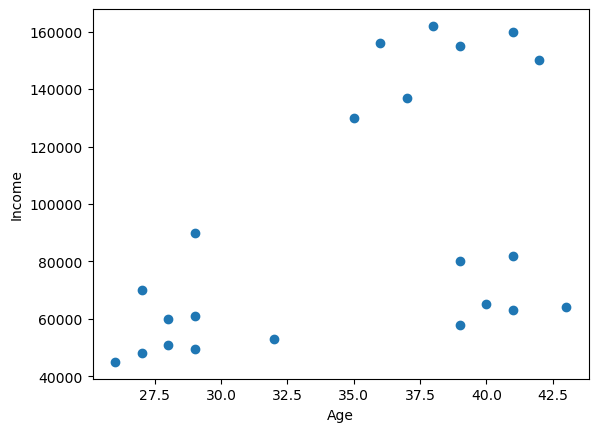

In [9]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [10]:
km = KMeans(n_clusters=3)  # here the number 3 has been observed from the above scatter plot
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
      dtype=int32)

In [11]:
df['cluster'] = y_predicted

In [12]:
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,2


In [13]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05]])

In [14]:
# we will draw the scatter plot to understand the each clustor

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


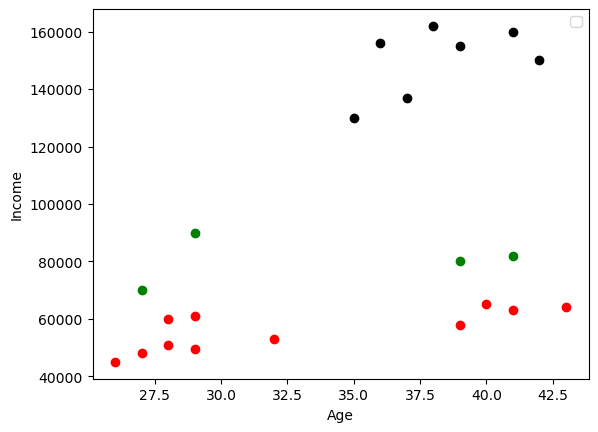

In [16]:
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [17]:
# the issue in clustering is due to scalling in y and x axis

In [18]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [19]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [20]:
# the scale is OK now

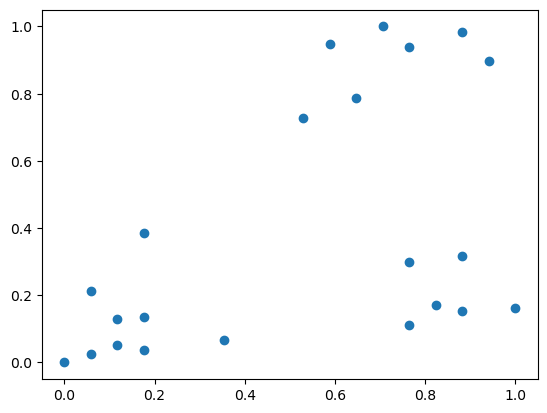

In [21]:
plt.scatter(df.Age, df['Income($)'])

In [22]:
km = KMeans(n_clusters=3)  # here the number 3 has been observed from the above scatter plot
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [23]:
df['cluster'] = y_predicted

In [24]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [25]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

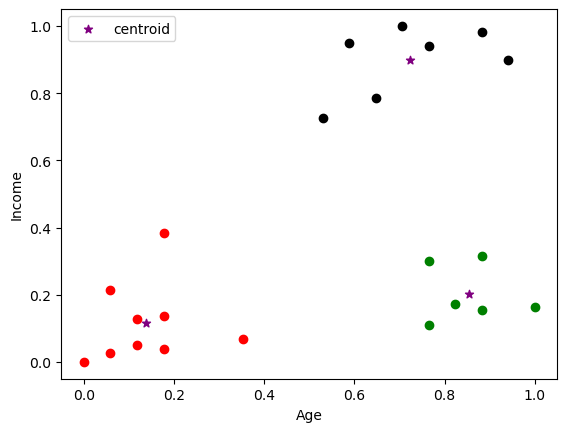

In [26]:
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
# to print the centroid
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [27]:
# if there are many features than we will use the elbow method

In [28]:
sse = []

k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)    # km.inertia_ it will tell the SSE

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

In [29]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26640301246684156,
 0.2187801089333045,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

range(1, 10)


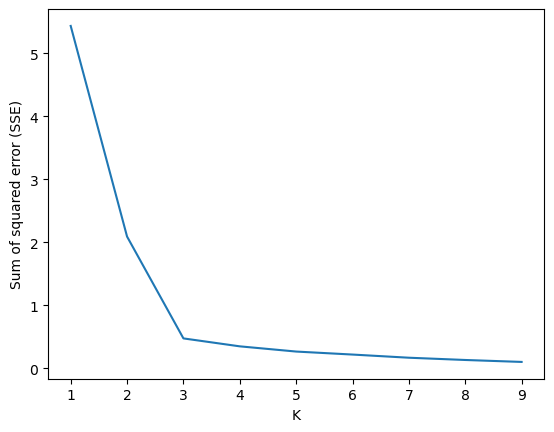

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error (SSE)')
plt.plot(k_rng, sse)
print(k_rng)

# Exercise

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()

In [54]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [55]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
# Create a pandas DataFrame from the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)



In [57]:
iris_df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)

In [58]:
iris_df.head(10)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [59]:
# iris_df['flower'] = iris.target
# iris_df.head(10)

In [60]:
iris_df.head(10)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


In [61]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(iris_df)
yp

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [63]:
iris_df['cluster'] = yp
iris_df.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1


In [64]:
df.cluster.unique()

array([0, 2, 1], dtype=int32)

In [67]:
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df.cluster==1]
df3 = iris_df[iris_df.cluster==2]

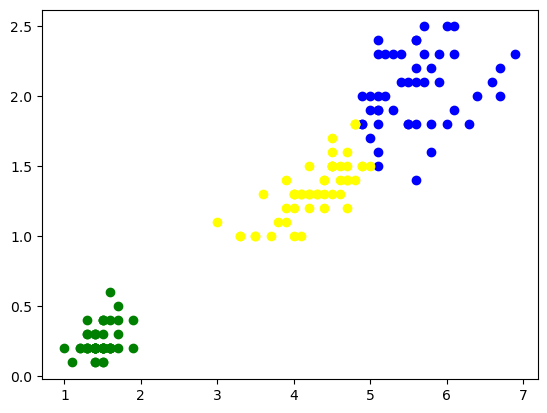

In [68]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

### Elbow plot

In [69]:
sse = []

k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_)    # km.inertia_ it will tell the SSE

/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kashiii/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [70]:
sse

[650.7886666666665,
 186.27970291146767,
 31.37135897435897,
 22.649637861231334,
 14.190205868205867,
 11.412196969696968,
 9.922190789473682,
 7.788416714864081,
 6.8802649182602735]

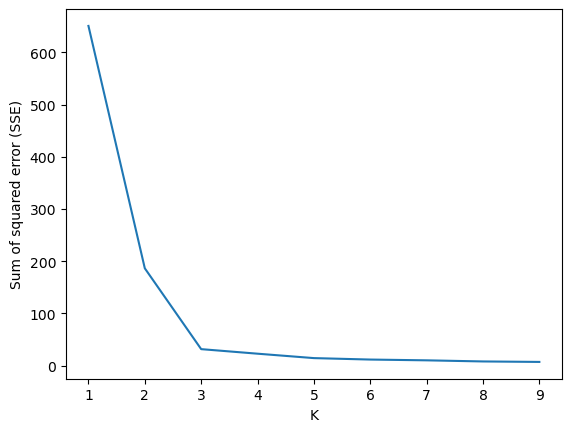

In [71]:
plt.xlabel('K')
plt.ylabel('Sum of squared error (SSE)')
plt.plot(k_rng, sse)

In [ ]:
# the value of K is 3